In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
def select_rate(failure_rate_set: float, resilience: int):
    conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/new.db')

    sql = f"""
    SELECT task_success_rate
    FROM workflow 
    WHERE failure_rate_set = {failure_rate_set} 
    AND resilience = {resilience}
    AND makespan IS NOT NULL
    AND workflow IS 'cholesky'
    AND node_cnt IS 17
    AND failure_type IS 'memory'
    """
    df = pd.read_sql_query(sql, conn)
    average = df['task_success_rate'].mean()
    sem = df['task_success_rate'].sem()

    conn.close()
    return average, sem

In [6]:
x = []
y = []
yerr = []
for failure_rate in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    for resilience in [1, 0]:
        rate, sem = select_rate(failure_rate, resilience)
        x.append(failure_rate)
        y.append(rate)
        yerr.append(sem)

print(x)
print(y)
print(yerr)

data = pd.DataFrame({'failure_rate': x, 'task_success_rate': y, 'resilience': ['Parsl with WRATH', 'Parsl without WRATH'] * 6, 'sem': yerr})
df = pd.DataFrame(data)
df

[0.05, 0.05, 0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3]
[np.float64(1.0), np.float64(0.9428571428571428), np.float64(0.9666666666666668), np.float64(0.8571428571428571), np.float64(0.9500000000000002), np.float64(0.8928571428571429), np.float64(0.9833333333333334), np.float64(0.7142857142857142), np.float64(0.8547619047619047), np.float64(0.7428571428571429), np.float64(0.9547619047619047), np.float64(0.7214285714285714)]
[np.float64(0.0), np.float64(0.05714285714285713), np.float64(0.022222222222222216), np.float64(0.09523809523809523), np.float64(0.025458753860865768), np.float64(0.07162670931662535), np.float64(0.016666666666666663), np.float64(0.12046772038736682), np.float64(0.05075022945634339), np.float64(0.13602720816272093), np.float64(0.03143698781006088), np.float64(0.11878542555491828)]


,failure_rate,task_success_rate,resilience,sem
0,0.05,1.000000,Parsl with WRATH,0.000000
1,0.05,0.942857,Parsl without WRATH,0.057143
2,0.10,0.966667,Parsl with WRATH,0.022222
3,0.10,0.857143,Parsl without WRATH,0.095238
4,0.15,0.950000,Parsl with WRATH,0.025459
5,0.15,0.892857,Parsl without WRATH,0.071627
6,0.20,0.983333,Parsl with WRATH,0.016667
7,0.20,0.714286,Parsl without WRATH,0.120468
8,0.25,0.854762,Parsl with WRATH,0.050750
9,0.25,0.742857,Parsl without WRATH,0.136027


/tmp/ipykernel_19021/3684756116.py:20: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=df, x='failure_rate', y='task_success_rate', hue='resilience', style='resilience', markers='o', dashes=False, palette=custom_palette)


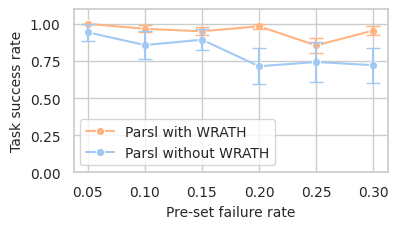

In [7]:
sns.set_theme(style="whitegrid")
# sns.set_palette("pastel")

pastel_palette = sns.color_palette("pastel")
blue_color = pastel_palette[0]  # 蓝色
orange_color = pastel_palette[1]  # 橙色
custom_palette = {
    'Parsl with WRATH': orange_color,
    'Parsl without WRATH': blue_color
}

plt.rc('font', size=10)  # 控制默认文本的大小
plt.rc('axes', titlesize=10)  # 控制标题的大小
plt.rc('axes', labelsize=10)  # 控制x轴和y轴标签的大小
plt.rc('xtick', labelsize=10)  # 控制x轴刻度的大小
plt.rc('ytick', labelsize=10)  # 控制y轴刻度的大小
plt.rc('legend', fontsize=10)  # 控制图例的字体大小

plt.figure(figsize=(4, 2.4))
ax = sns.lineplot(data=df, x='failure_rate', y='task_success_rate', hue='resilience', style='resilience', markers='o', dashes=False, palette=custom_palette)
ax.set_ylim(0, 1.1)

# Get the colors used by seaborn
handles, labels = ax.get_legend_handles_labels()
color_dict = {label: handle.get_color() for handle, label in zip(handles, labels)}

# Add error bars manually with the same color as the lines
for i, row in df.iterrows():
    plt.errorbar(x=row['failure_rate'], y=row['task_success_rate'], yerr=row['sem'], 
                fmt='none', c=color_dict[row['resilience']], capsize=5)

new_labels = ['Parsl with WRATH', 'Parsl without WRATH']

# 绘制图例并设置新的标签
plt.legend(handles, new_labels)

plt.xlabel('Pre-set failure rate')
plt.ylabel('Task success rate')
# plt.legend(title='Resilience')
plt.tight_layout()
plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/cholesky_rate.pdf')
plt.show()